In [32]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

609

In [3]:
# Starting URL for Weather Map API Call
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key 

# List of city data
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "&q=" + city
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out the max temp, humidity, and cloudiness
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

_data_file

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | pumiao
Processing Record 2 of Set 1 | hilo
Processing Record 3 of Set 1 | rikitea
Processing Record 4 of Set 1 | hithadhoo
Processing Record 5 of Set 1 | atuona
Processing Record 6 of Set 1 | yellowknife
Processing Record 7 of Set 1 | punta arenas
Processing Record 8 of Set 1 | albany
Processing Record 9 of Set 1 | clarence town
Processing Record 10 of Set 1 | hengyang
Processing Record 11 of Set 1 | belushya guba
City not found. Skipping...
Processing Record 12 of Set 1 | avarua
Processing Record 13 of Set 1 | benghazi
Processing Record 14 of Set 1 | umm lajj
Processing Record 15 of Set 1 | dikson
Processing Record 16 of Set 1 | hofn
Processing Record 17 of Set 1 | laguna
Processing Record 18 of Set 1 | ushuaia
Processing Record 19 of Set 1 | busselton
Processing Record 20 of Set 1 | half moon bay
Processing Record 21 of Set 1 | saint-philippe
Processing Record 22 of Set 1 | khrebtovaya
Processi

Processing Record 38 of Set 4 | upington
Processing Record 39 of Set 4 | bathsheba
Processing Record 40 of Set 4 | moree
Processing Record 41 of Set 4 | saldanha
Processing Record 42 of Set 4 | hamilton
Processing Record 43 of Set 4 | kieta
Processing Record 44 of Set 4 | odweyne
Processing Record 45 of Set 4 | coolum beach
Processing Record 46 of Set 4 | paungde
Processing Record 47 of Set 4 | juneau
Processing Record 48 of Set 4 | solovetskiy
City not found. Skipping...
Processing Record 49 of Set 4 | norman wells
Processing Record 0 of Set 5 | benicarlo
Processing Record 1 of Set 5 | lolua
City not found. Skipping...
Processing Record 2 of Set 5 | sinnamary
Processing Record 3 of Set 5 | hobart
Processing Record 4 of Set 5 | muros
Processing Record 5 of Set 5 | general roca
Processing Record 6 of Set 5 | dilla
Processing Record 7 of Set 5 | acapulco
Processing Record 8 of Set 5 | pontes e lacerda
Processing Record 9 of Set 5 | turukhansk
Processing Record 10 of Set 5 | hirara
Proces

Processing Record 30 of Set 8 | asosa
Processing Record 31 of Set 8 | viedma
Processing Record 32 of Set 8 | maniitsoq
Processing Record 33 of Set 8 | vangaindrano
Processing Record 34 of Set 8 | ambilobe
Processing Record 35 of Set 8 | mehamn
Processing Record 36 of Set 8 | inongo
Processing Record 37 of Set 8 | lawrenceburg
Processing Record 38 of Set 8 | chicama
Processing Record 39 of Set 8 | hambantota
Processing Record 40 of Set 8 | sisimiut
Processing Record 41 of Set 8 | riyadh
Processing Record 42 of Set 8 | udayagiri
Processing Record 43 of Set 8 | amot
Processing Record 44 of Set 8 | le vauclin
Processing Record 45 of Set 8 | byron bay
Processing Record 46 of Set 8 | mariental
Processing Record 47 of Set 8 | warqla
City not found. Skipping...
Processing Record 48 of Set 8 | coquimbo
Processing Record 49 of Set 8 | san rafael del sur
Processing Record 0 of Set 9 | rio verde de mato grosso
Processing Record 1 of Set 9 | bosaso
Processing Record 2 of Set 9 | joshimath
Processin

Processing Record 19 of Set 12 | rovaniemi
Processing Record 20 of Set 12 | ancona
Processing Record 21 of Set 12 | hopkinsville
Processing Record 22 of Set 12 | iqaluit
Processing Record 23 of Set 12 | zheleznodorozhnyy
Processing Record 24 of Set 12 | darnah
Processing Record 25 of Set 12 | collie
Processing Record 26 of Set 12 | shelby
Processing Record 27 of Set 12 | nizhneyansk
City not found. Skipping...
Processing Record 28 of Set 12 | necochea
Processing Record 29 of Set 12 | parkes
Processing Record 30 of Set 12 | soe
Processing Record 31 of Set 12 | tortel
Processing Record 32 of Set 12 | dhidhdhoo
Processing Record 33 of Set 12 | san clemente
Processing Record 34 of Set 12 | nilakkottai
Processing Record 35 of Set 12 | pimenta bueno
Processing Record 36 of Set 12 | la paz
Processing Record 37 of Set 12 | ust-kamchatsk
City not found. Skipping...
Processing Record 38 of Set 12 | voh
Processing Record 39 of Set 12 | beloha
Processing Record 40 of Set 12 | xining
Processing Rec

In [ ]:
# Convert array of JSONs into Pandas DataFrame
city_data_pd = pd.DataFrame(city_data)

In [ ]:
# Extract relevant fields from the data frame
lats = city_data_pd["Lat"]
max_temps = city_data_pd["Max Temp"]
humidity = city_data_pd["Humidity"]
cloudiness = city_data_pd["Cloudiness"]
wind_speed = city_data_pd["Wind Speed"]

In [33]:
# Export the City_Data into a csv
pd.DataFrame(city_data)
city_data_pd.to_csv(output_data_file, index_label="City_ID")

In [30]:
city_data_pd

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,pumiao,22.75,108.48,68.00,94,90,2.24,CN,1583533055
1,hilo,19.73,-155.09,77.00,69,75,19.46,US,1583532949
2,rikitea,-23.12,-134.97,78.33,79,100,23.80,PF,1583533062
3,hithadhoo,-0.60,73.08,82.99,68,0,8.41,MV,1583533062
4,atuona,-9.80,-139.03,81.34,68,23,11.34,PF,1583533062
...,...,...,...,...,...,...,...,...,...
554,bandarbeyla,9.49,50.81,77.67,79,1,11.54,SO,1583533110
555,kathmandu,27.72,85.32,51.80,76,75,9.17,NP,1583533110
556,freeport,40.66,-73.58,45.00,52,90,16.11,US,1583532853
557,duluth,46.78,-92.11,35.60,63,1,5.82,US,1583532921


In [21]:
# Show Record Count
city_data_pd.count()

City          559
Lat           559
Lng           559
Max Temp      559
Humidity      559
Cloudiness    559
Wind Speed    559
Country       559
Date          559
dtype: int64

In [5]:
# Display the City Data Frame
city_data_pd.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,pumiao,22.75,108.48,68.00,94,90,2.24,CN,1583533055
1,hilo,19.73,-155.09,77.00,69,75,19.46,US,1583532949
2,rikitea,-23.12,-134.97,78.33,79,100,23.80,PF,1583533062
3,hithadhoo,-0.60,73.08,82.99,68,0,8.41,MV,1583533062
4,atuona,-9.80,-139.03,81.34,68,23,11.34,PF,1583533062


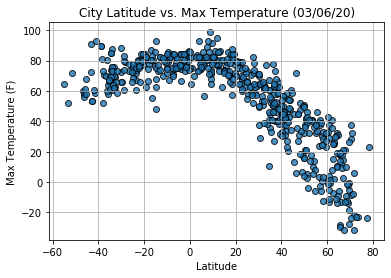

In [6]:
# Build scatter plot for latitude vs. temperature
plt.scatter(lats, 
            max_temps,
            edgecolor="black", linewidths=1, marker="o", 
            alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Max Temperature (%s)" % time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("latvtemp.png")

# Show plot
plt.show()

#The below plot helps us to understand the correlation between latitude and temperature. Are higher temperatures 
# associated with certain latitudes? It appears that the highest temperatures are found between -40 and 20 latitude. 

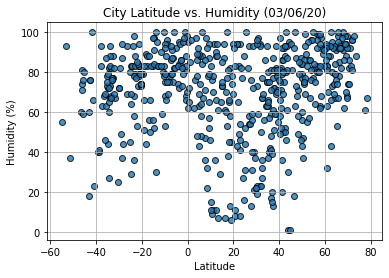

In [7]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(lats, 
            humidity,
            edgecolor="black", linewidths=1, marker="o", 
            alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity (%s)" % time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("latvhum.png")

# Show plot
plt.show()

#The below plot helps us to understand the correlation between latitude and humidity. Are certain latitudes
# more humid? It appears that the humidity occurs between 80% and 100% at nearly every latitude. 

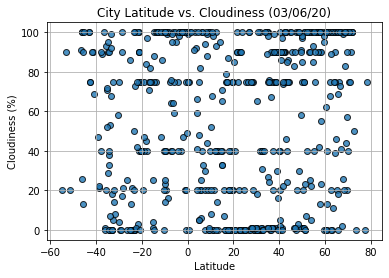

In [8]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(lats, 
            cloudiness,
            edgecolor="black", linewidths=1, marker="o", 
            alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness (%s)" % time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("latvcloud.png")

# Show plot
plt.show()

#The below plot helps us to understand the correlation between latitude and cloudiness. Do certain latitudes
# have more clouds? It appears that all latitudes have clouds.

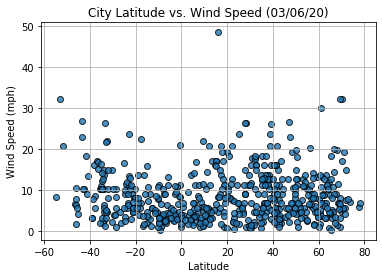

In [9]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(lats, 
            wind_speed,
            edgecolor="black", linewidths=1, marker="o", 
            alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed (%s)" % time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("latvwind.png")

# Show plot
plt.show()

#The below plot helps us to understand the correlation between latitude and wind speed. Do certain latitudes have higer
# wind speeds? It appears that most latitudes exhibit wind speeds from 0 to 30 mph, while there are some outliers.

In [10]:
# Create a function to create Linear Regression plots
def plot_linear_regression(x_values, y_values, title, text_coordinates):
    
    # Run regresson on southern hemisphere
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

    # Plot
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r-")
    plt.annotate(line_eq,text_coordinates,fontsize=15,color="red")
    plt.xlabel('Latitude')
    plt.ylabel(title)
    print(f"The r-squared is: {rvalue}")
    plt.show()

In [11]:
# Create Northern and Southern Hemisphere DataFrames
northern_hemi_df = city_data_pd.loc[(city_data_pd[("Lat")] >= 0)]
southern_hemi_df = city_data_pd.loc[(city_data_pd[("Lat")] < 0)]

The r-squared is: -0.879569909226462


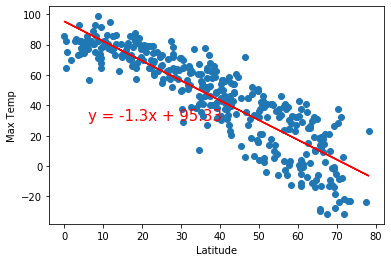

In [12]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
plot_linear_regression(x_values, y_values, 'Max Temp',(6,30))

The r-squared is: 0.47833657552012177


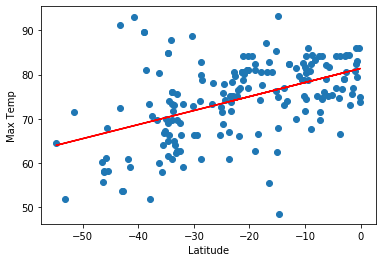

In [13]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
plot_linear_regression(x_values, y_values, 'Max Temp', (-30,40))

The r-squared is: 0.30351880482750054


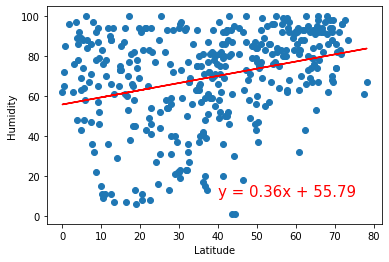

In [14]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
plot_linear_regression(x_values, y_values, 'Humidity',(40,10))

The r-squared is: 0.3736418288298474


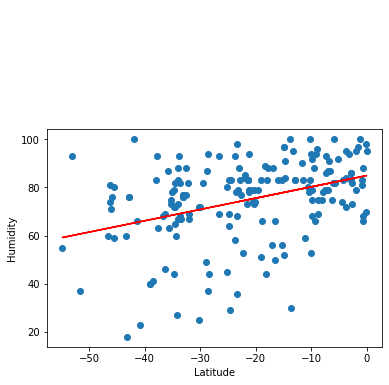

In [15]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
plot_linear_regression(x_values, y_values, 'Humidity', (-30,150))

The r-squared is: 0.23834601337673164


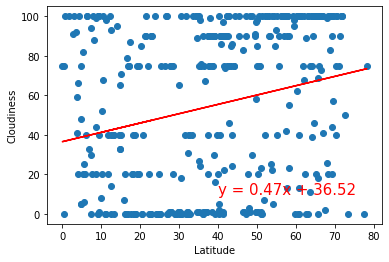

In [16]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
plot_linear_regression(x_values, y_values, 'Cloudiness', (40,10))

The r-squared is: 0.20932576080189674


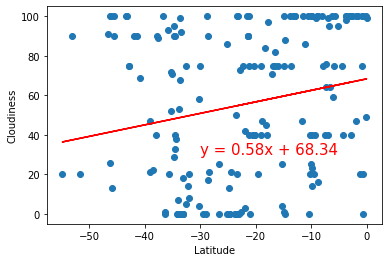

In [17]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
plot_linear_regression(x_values, y_values, 'Cloudiness', (-30,30))

The r-squared is: 0.048274396195523525


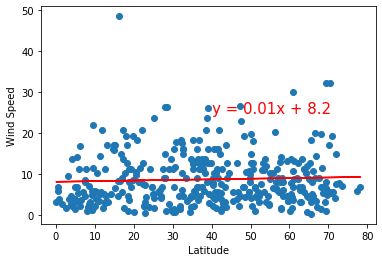

In [18]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
plot_linear_regression(x_values, y_values, 'Wind Speed', (40,25))

The r-squared is: -0.35999499372103716


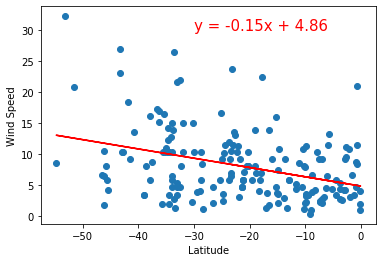

In [19]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
plot_linear_regression(x_values, y_values, 'Wind Speed', (-30,30))